<a href="https://colab.research.google.com/github/kosebaris1/MACHINE_LEARNING/blob/CNN/CNN_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [9]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

class_names = ["Uçak","Araba","Kuş","Kedi","Geyik","Köpek","Kurbağa","At","Gemi","Kamyon"]


x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0


num_classes = 10
y_train_ohe = keras.utils.to_categorical(y_train, num_classes)
y_test_ohe  = keras.utils.to_categorical(y_test, num_classes)

In [10]:
def build_model():
    inputs = keras.Input(shape=(32,32,3))

    # Blok 1
    x = layers.Conv2D(32, (3,3), padding="same", activation="relu")(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2,2))(x)
    x = layers.Dropout(0.1)(x)

    # Blok 2
    x = layers.Conv2D(64, (3,3), padding="same", activation="relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2,2))(x)
    x = layers.Dropout(0.2)(x)

    # Blok 3
    x = layers.Conv2D(128, (3,3), padding="same", activation="relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2,2))(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Flatten()(x)
    x = layers.Dense(128, activation="relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(10, activation="softmax")(x)

    model = keras.Model(inputs, outputs, name="cnn_cifar10_tr")
    return model

model = build_model()
model.summary()

Model: "cnn_cifar10_tr"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 358,218 (1.37 MB)

 Trainable params: 357,514 (1.36 MB)

 Non-trainable params: 704 (2.75 KB)

In [11]:
opt = keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

In [12]:
history = model.fit(
    x_train, y_train_ohe,
    epochs=20,
    batch_size=64,
    validation_split=0.1,
    verbose=1
)

Epoch 1/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.2441 - loss: 2.5461 - val_accuracy: 0.4206 - val_loss: 1.6060
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3998 - loss: 1.7851 - val_accuracy: 0.5122 - val_loss: 1.3959
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4634 - loss: 1.5496 - val_accuracy: 0.5634 - val_loss: 1.2285
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5119 - loss: 1.3997 - val_accuracy: 0.5804 - val_loss: 1.1919
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5484 - loss: 1.2814 - val_accuracy: 0.6160 - val_loss: 1.1033
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5812 - loss: 1.1897 - val_accuracy: 0.6374 - val_loss: 1.0502
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6022 - loss: 1.1299 - val_accuracy: 0.6700 - val_loss: 0.9528
Epoch 8/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6200 - loss: 1.0755 - val_accuracy: 

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test_ohe, verbose=0)
print(f"\n✅ Test Kayıp: {test_loss:.4f} | Test Doğruluk: {test_acc:.4f}")


✅ Test Kayıp: 0.7111 | Test Doğruluk: 0.7530


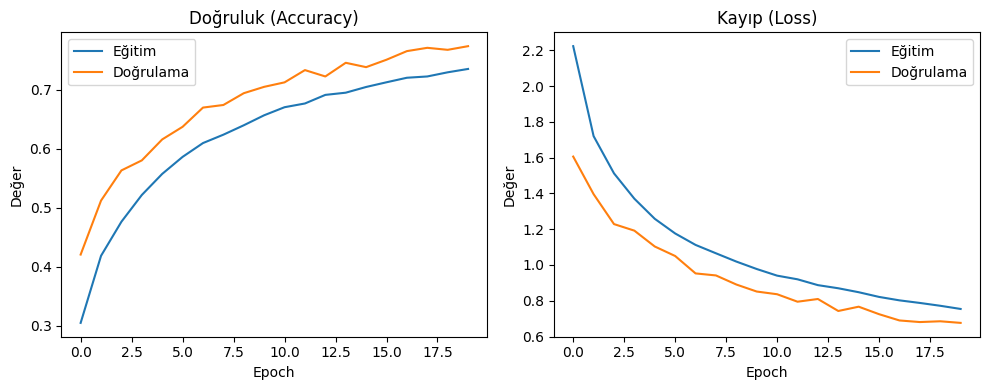

In [14]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"]); plt.plot(history.history["val_accuracy"])
plt.title("Doğruluk (Accuracy)"); plt.xlabel("Epoch"); plt.ylabel("Değer")
plt.legend(["Eğitim","Doğrulama"])

plt.subplot(1,2,2)
plt.plot(history.history["loss"]); plt.plot(history.history["val_loss"])
plt.title("Kayıp (Loss)"); plt.xlabel("Epoch"); plt.ylabel("Değer")
plt.legend(["Eğitim","Doğrulama"])
plt.tight_layout(); plt.show()


Sınıflandırma Raporu:

              precision    recall  f1-score   support

        Uçak       0.80      0.75      0.77      1000
       Araba       0.88      0.85      0.87      1000
         Kuş       0.72      0.58      0.64      1000
        Kedi       0.65      0.48      0.56      1000
       Geyik       0.65      0.80      0.72      1000
       Köpek       0.66      0.67      0.66      1000
     Kurbağa       0.69      0.92      0.79      1000
          At       0.85      0.77      0.81      1000
        Gemi       0.80      0.89      0.84      1000
      Kamyon       0.85      0.83      0.84      1000

    accuracy                           0.75     10000
   macro avg       0.76      0.75      0.75     10000
weighted avg       0.76      0.75      0.75     10000



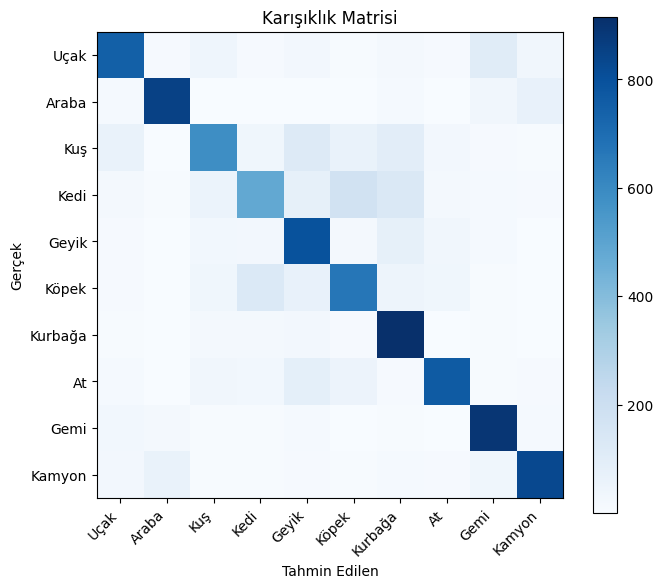

In [15]:
y_pred_probs = model.predict(x_test, batch_size=256, verbose=0)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = y_test.flatten()

print("\nSınıflandırma Raporu:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(7,6))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Karışıklık Matrisi")
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45, ha="right")
plt.yticks(tick_marks, class_names)
plt.xlabel('Tahmin Edilen'); plt.ylabel('Gerçek')
plt.tight_layout(); plt.show()

/tmp/ipython-input-68177469.py:18: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0,0,1,0.96])
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


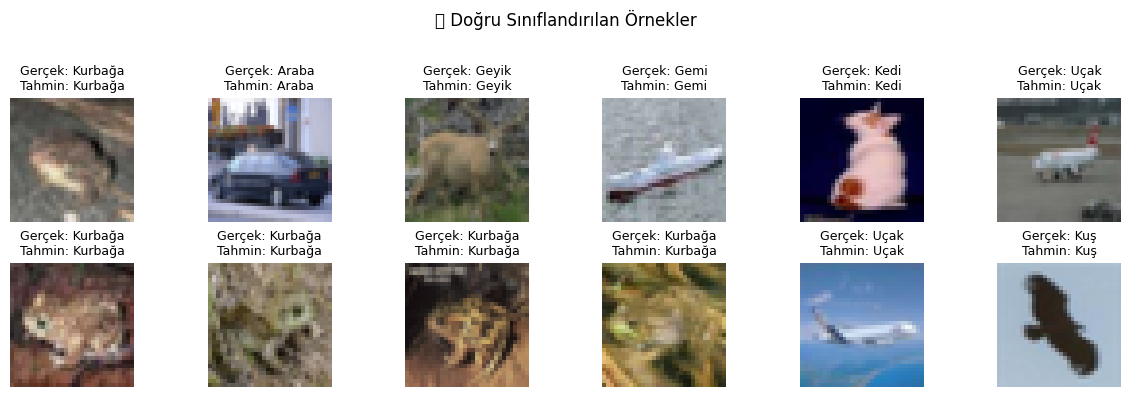

/tmp/ipython-input-68177469.py:18: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0,0,1,0.96])
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


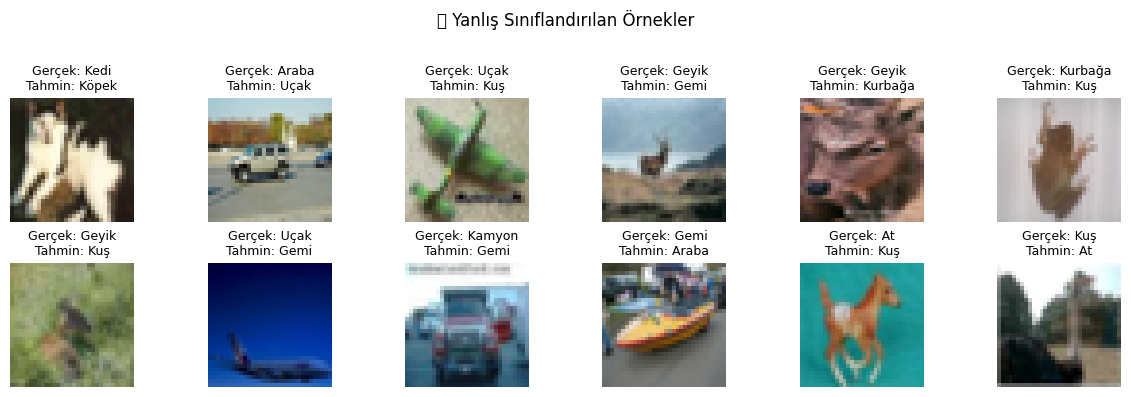

In [16]:
correct_idx = np.where(y_pred == y_true)[0]
wrong_idx   = np.where(y_pred != y_true)[0]

def show_samples(indices, title, n=12):
    n = min(n, len(indices))
    sel = np.random.choice(indices, size=n, replace=False)
    cols = 6
    rows = int(np.ceil(n / cols))
    plt.figure(figsize=(cols*2, rows*2))
    for i, idx in enumerate(sel, 1):
        plt.subplot(rows, cols, i)
        plt.imshow(x_test[idx])
        gt = class_names[int(y_true[idx])]
        pr = class_names[int(y_pred[idx])]
        plt.title(f"Gerçek: {gt}\nTahmin: {pr}", fontsize=9)
        plt.axis("off")
    plt.suptitle(title)
    plt.tight_layout(rect=[0,0,1,0.96])
    plt.show()

# 12 örnek doğru sınıflandırılan
show_samples(correct_idx, "✅ Doğru Sınıflandırılan Örnekler", n=12)

# 12 örnek yanlış sınıflandırılan
show_samples(wrong_idx, "❌ Yanlış Sınıflandırılan Örnekler", n=12)